In [37]:
import numpy as np
from funcs import *
import matplotlib as mpl
import matplotlib.pyplot as plt

class Adam(object):
    
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.theta = 1e-7
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0 # 用来记录 更新梯度的 次数

        self.v = None # 速度 类似 Momentum
        self.s = None # 用来在接近终点的时候减小学习率，类似 Adagrad

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            self.s = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                self.s[key] = np.zeros_like(val)
        
        self.iter += 1.0  # 每调用一次，记录一下梯度更新的次数

        # 偏置修正
        lr_t = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta2**self.iter)

        # 更新梯度
        for key in params.keys():
            # 更新 v 和 s
            # self.v[key] += (1 - self.beta1) * (grads[key] - self.v[key])
            # self.s[key] += (1 - self.beta2) * (grads[key]**2 - self.s[key])

            # 另一种写法 (更容易理解)
            self.v[key] = self.beta1*self.v[key] + (1-self.beta1)*grads[key]
            self.s[key] = self.beta2*self.s[key] + (1-self.beta2)*(grads[key]**2)

            grads_new = self.v[key] / (np.sqrt(self.s[key]) + self.theta)

            # 更新参数
            params[key] -= lr_t * grads_new
        

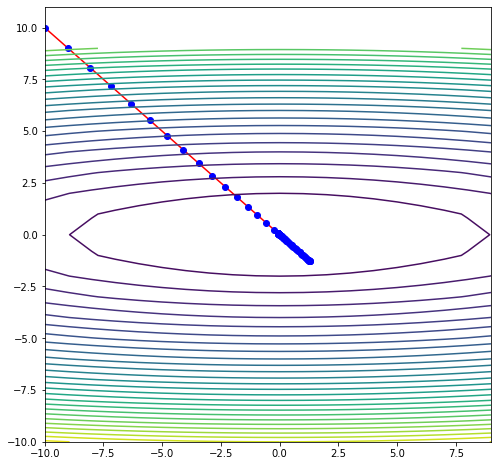

In [38]:
# --- 测试 ---
def f(X):
    return (1/20) * X[0]**2 + X[1]**2

learning_rate = 0.01
optimizer = Adam(learning_rate)

# 梯度下降地更新速度
update_times = 100

x = np.array([-10.0, 10.0])
params = {}
params['X'] = x

# 存放坐标的列表
x_list=[]
y_list=[]
    # 存放初始坐标
x_list.append(x[0])
y_list.append(x[1])

grads = {}
for i in range(update_times):
    grads['X'] = numerical_gradient(f, params['X'])
    optimizer.update(params, grads)
    x_list.append(x[0])
    y_list.append(x[1])
    

# 绘图配置
fig = plt.figure(figsize=(8,8))
ax = fig.gca()

# 等高线数据
x = np.arange(-10,10,1)
y = x.copy()
x,y = np.meshgrid(x,y)
X = np.array([x,y])
z = f(X)

    # 梯度图
ax.plot(x_list, y_list,'r-')
ax.plot(x_list, y_list,'bo')

    # 等高线图
ax.contour(X[0],X[1],z, levels=30)

Adam用了16步
SGD 用了189步


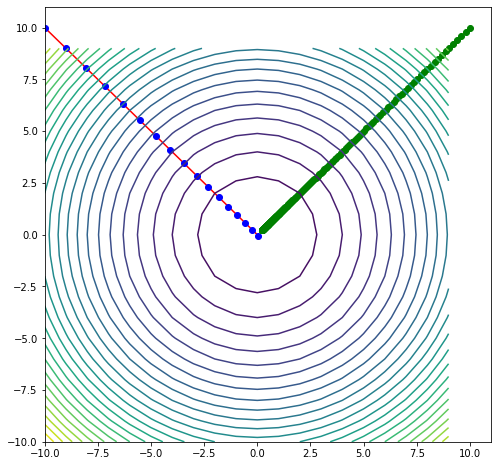

In [39]:
# ----- 对比 Adam 和 SGD -----
class SGD(object):
    def __init__(self, lr):
        self.lr = lr

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]
            

def f(X):
    return X[0]**2 + X[1]**2

learning_rate = 0.01
# 梯度下降地更新速度
update_times = 10000

# --- Adam ---
optimizer = Adam(learning_rate)


x = np.array([-10.0, 10.0])
params = {}
params['X'] = x

# 存放坐标的列表
x_list=[]
y_list=[]
    # 存放初始坐标
x_list.append(x[0])
y_list.append(x[1])

grads = {}
for i in range(update_times):
    grads['X'] = numerical_gradient(f, params['X'])
    optimizer.update(params, grads)

    x_list.append(x[0])
    y_list.append(x[1])

    # 如果达到收敛标准，退出循环
    if x[0]**2 + x[1]**2 <= 0.1: 
        print('Adam用了%d步' % (i+1))
        break
    
#  --- SGD ---
optimizer = SGD(learning_rate)

x = np.array([10.0, 10.0])
params = {}
params['X'] = x

# 存放坐标的列表
x_list_sgd=[]
y_list_sgd=[]
    # 存放初始坐标
x_list_sgd.append(x[0])
y_list_sgd.append(x[1])

grads = {}
for i in range(update_times):
    grads['X'] = numerical_gradient(f, params['X'])
    optimizer.update(params, grads)

    x_list_sgd.append(x[0])
    y_list_sgd.append(x[1])

    if x[0]**2 + x[1]**2 <= 0.1:
        print('SGD 用了%d步' % (i+1))
        break

# 绘图配置
fig = plt.figure(figsize=(8,8))
ax = fig.gca()

# 等高线数据
x = np.arange(-10,10,1)
y = x.copy()
x,y = np.meshgrid(x,y)
X = np.array([x,y])
z = f(X)

    # 梯度图
ax.plot(x_list, y_list,'r-')
ax.plot(x_list, y_list,'bo')
ax.plot(x_list_sgd, y_list_sgd,'y-')
ax.plot(x_list_sgd, y_list_sgd,'go')

    # 等高线图
ax.contour(X[0],X[1],z, levels=30)
